<a href="https://colab.research.google.com/github/GODxFATHER/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Importing Librabries

In [3]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
from scipy import stats
from scipy.stats import norm, skew


In [5]:
# # Configuration for matplotlib graphs

# matplotlib.rcParams['font.size'] = 12
# matplotlib.rcParams['figure.figsize'] = (13, 7)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'
# sns.set_style('darkgrid');

#Loading the Dataset

In [6]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Loading the csv file into pandas dataframe

# path_r = "/content/drive/MyDrive/EDA - Capstone Project/Airbnb NYC 2019.csv"
path_p = '/content/SeoulBikeData.csv'
path_n = "/content/drive/MyDrive/DATA_FILES/SeoulBikeData.csv"
df = pd.read_csv(path_n, encoding= 'unicode_escape')

In [8]:
#rows and columns in dataset
df.shape

(8760, 14)

In [9]:
#printing the first 5 rows of dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


So we have 8769 Rows and 14 features

In [10]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Here we see the following columns are objects: -**

* **Date**
* **Season**
* **Holiday**
* **Functionaing day**

**So we to convert them into datetime data type.**

**Date convert to Datetime**

**Rest we see later**

In [11]:
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

#let's check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [12]:
#checking for duplicacy in the dataset
df.duplicated().sum()

0

* **The dataset doesn't contain any duplicate rows.**

##Let's Check for null values

In [13]:
#checking the missing data in the dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **The dateset dont't have null values**

In [14]:
#dataset descriptive statistics

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [15]:
#dataset columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [16]:
#renaming dataset columns
bike_df = df.rename( columns = { "Rented Bike Count":"Rented_Bike_Count",
                   "Temperature(°C)":"Temperature",
                   "Humidity(%)":"Humidity",
                   "Wind speed (m/s)":"Wind_speed",
                   "Visibility (10m)":"Visibility",
                   "Dew point temperature(°C)":"Dew_point_temperature",
                   "Solar Radiation (MJ/m2)":"Solar_Radiation",
                   "Rainfall(mm)":"Rainfall",
                   "Snowfall (cm)":"Snowfall",
                   "Functioning Day":"Functioning_Day" } )
bike_df.head(1)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [17]:
# list of numerical variables
numerical_features = [feature for feature in bike_df.columns if bike_df[feature].dtypes != 'O']
numerical_features

['Date',
 'Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

In [18]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(bike_df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
bike_df[discrete_feature].head()

Discrete Variables Count: 1


,Hour
0,0
1,1
2,2
3,3
4,4


In [19]:
#year columns
bike_rent = bike_df.copy()
# bike_rent['year'] = bike_rent['Date'].dt.year
#month column 
bike_rent['month'] = bike_rent['Date'].dt.month_name() 
#day columns
# bike_rent['day'] = bike_rent['Date'].dt.day
#weekday columns
bike_rent['weekday'] = bike_rent['Date'].dt.day_name() 
#quarter columns
# bike_rent['quarter'] = bike_rent['Date'].dt.quarter   
 

In [20]:
# Dropping "Date" column

bike_rent.drop(columns = "Date", inplace = True)

In [21]:
# Descriptive summary of the dataset

bike_df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#EDA on features

##Let's explore Coloumns

##Univariate

**1. Dependent Variable**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


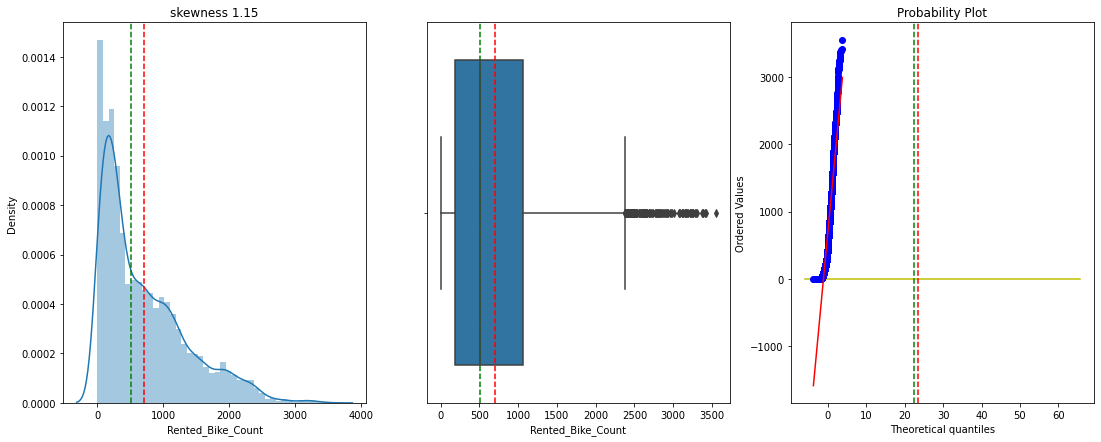

In [22]:
# Distribution of Dependent Variable after transformation

col = 'Rented_Bike_Count'
plt.figure(figsize=(25,7))

plt.subplot(1, 4, 1)
sns.distplot(bike_rent[col], kde=True)
plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
plt.title(f'skewness {round(bike_rent[col].skew(),2)}')

plt.subplot(1, 4, 2)
sns.boxplot(bike_rent[col])
plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  

plt.subplot(1, 4, 3)
sns.distplot(np.sqrt(bike_rent[col]), kde=True, color="y")
plt.axvline(np.median(np.sqrt(bike_rent[col])), color='g', linestyle='--')
plt.axvline(np.mean(np.sqrt(bike_rent[col])),color='r', linestyle='--')
plt.title(f'sqrt transformed skewness {round((np.sqrt(bike_rent[col])).skew(),2)}')

plt.subplot(1,4,3)
stats.probplot(bike_rent[col], plot=plt)
plt.show()

plt.show()

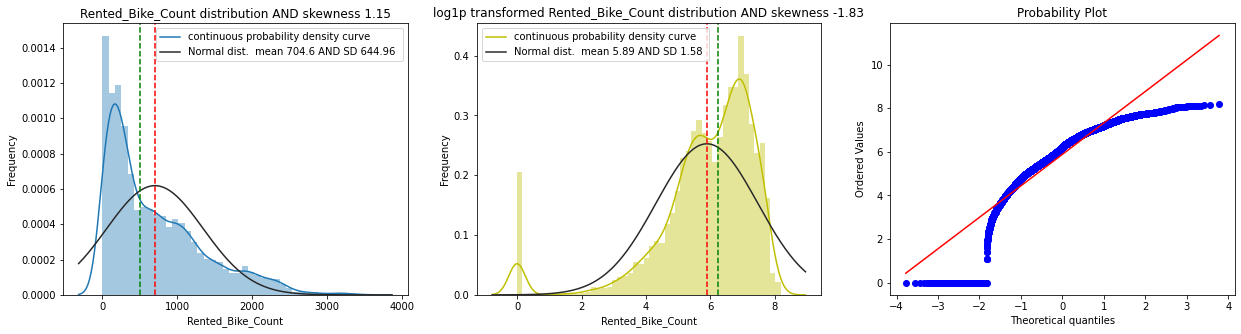

In [23]:
from scipy import stats
from scipy.stats import norm, skew

col='Rented_Bike_Count'

mean = round(norm.fit(bike_rent[col])[0],2)
sd = round(norm.fit(bike_rent[col])[1],2)

plt.figure(figsize=(21,5))

plt.subplot(1,3,1)

sns.distplot(bike_rent[col] , fit=norm, kde =True)
plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
# plt.title(f'skewness {round(bike_rent[col].skew(),2)}')
plt.legend(['continuous probability density curve', f'Normal dist.  mean {mean} AND SD {sd} '] , loc='best')
plt.ylabel('Frequency') 
plt.title(f'{col} distribution AND skewness {round(bike_rent[col].skew(),2)}')

plt.subplot(1,3,2)

mean = round(norm.fit(np.log1p(bike_rent[col]))[0],2)
sd = round(norm.fit(np.log1p(bike_rent[col]))[1],2)

sns.distplot(np.log1p(bike_rent[col]) , fit=norm, kde =True, color="y")
plt.axvline(np.median(np.log1p(bike_rent[col])),color='g', linestyle='--')
plt.axvline(np.mean(np.log1p(bike_rent[col])),color='r', linestyle='--')  
# plt.title(f'skewness {round(bike_rent[col].skew(),2)}')
plt.legend(['continuous probability density curve', f'Normal dist.  mean {mean} AND SD {sd} '] , loc='best')
plt.ylabel('Frequency') 
plt.title(f'log1p transformed {col} distribution AND skewness {round(np.log1p(bike_rent[col]).skew(),2)}')

plt.subplot(1,3,3)

stats.probplot(np.log1p(bike_rent[col]), plot=plt)

plt.show()

**2. Numerical Variable**

In [24]:
# Numeical features

num_attribs = bike_rent.describe().columns
num_attribs

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

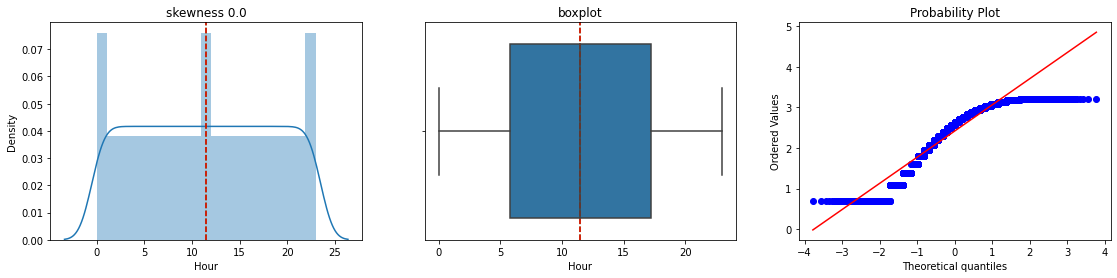

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


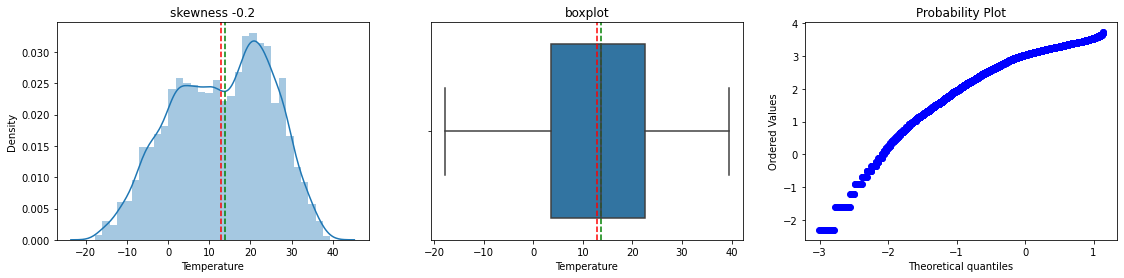

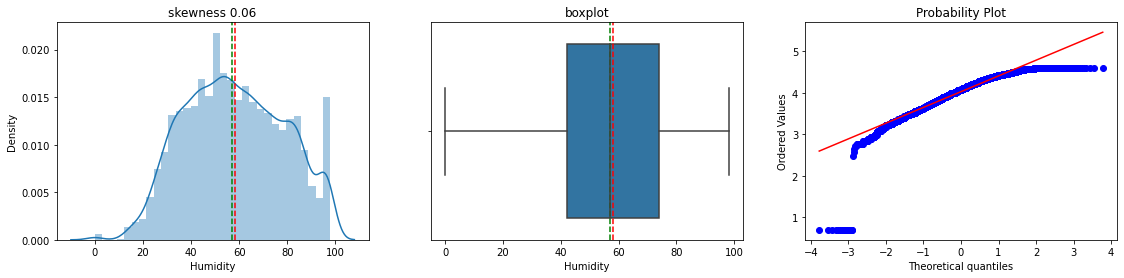

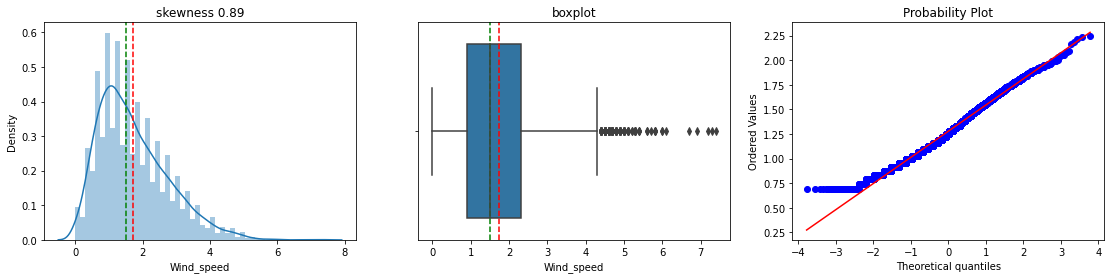

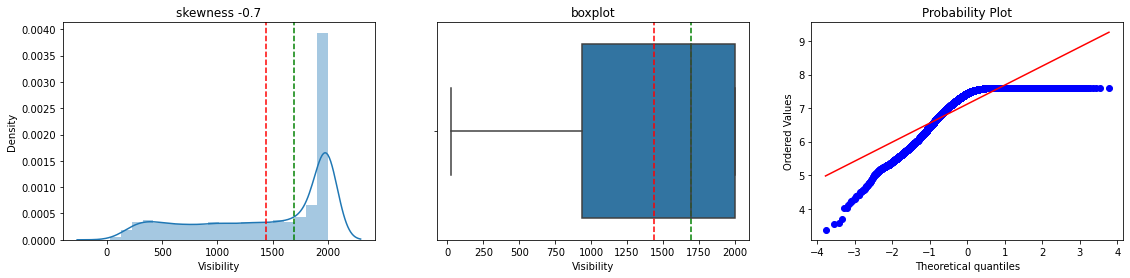

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


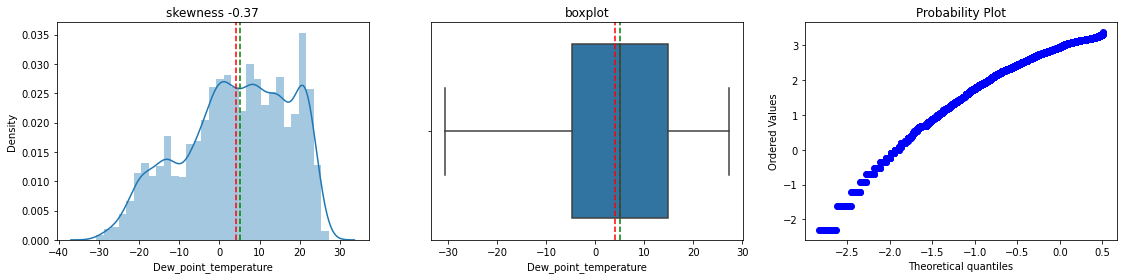

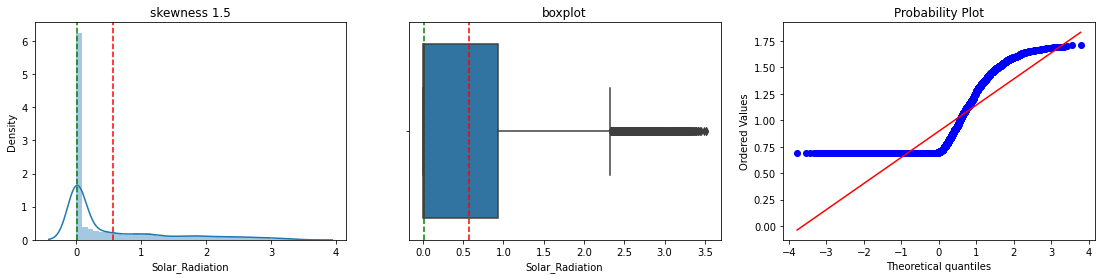

In [25]:
# density plot of numerical columns
# Distribution of numeric_features

for col in num_attribs[1:-2]:

  plt.figure(figsize=(19,4))

  plt.subplot(1, 3, 1)
  sns.distplot(bike_rent[col], kde=True)
  plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
  plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
  plt.title(f'skewness {round(bike_rent[col].skew(),2)}')

  plt.subplot(1, 3, 2)
  sns.boxplot(bike_rent[col])
  plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
  plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
  plt.title('boxplot') 
   
  plt.subplot(1,3,3)
  stats.probplot(np.log1p(bike_rent[col] + 1), plot=plt)

  plt.show()

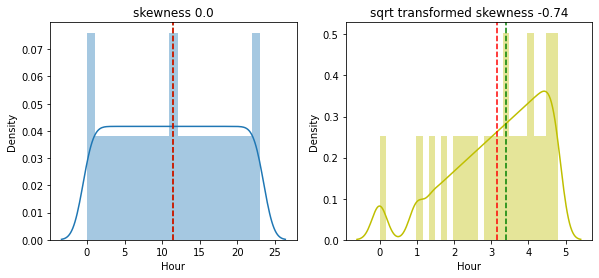

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


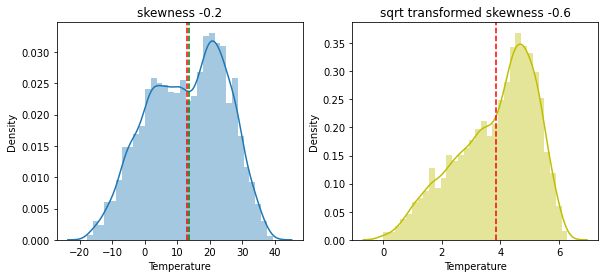

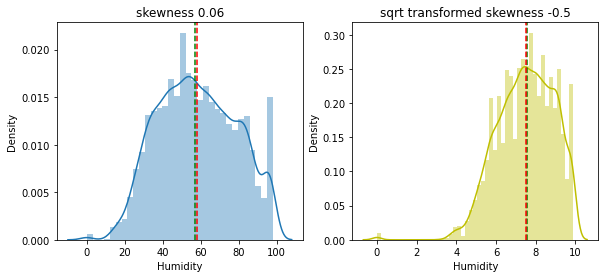

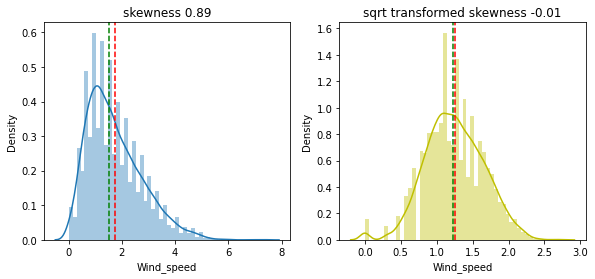

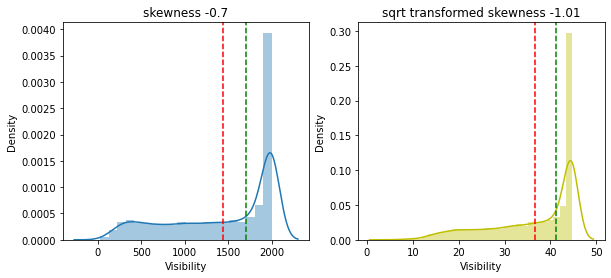

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


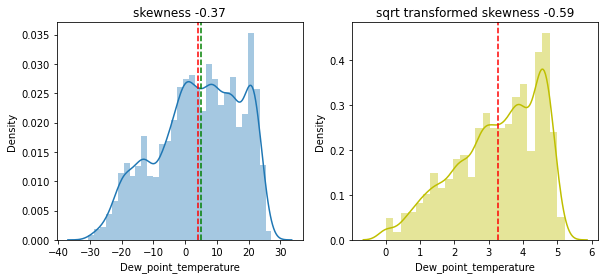

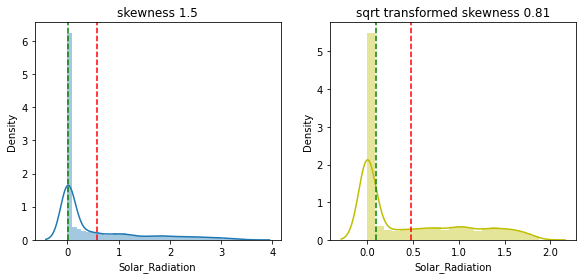

In [26]:
# transfrming Distribution of numeric_features

for col in num_attribs[1:-2]:

  plt.figure(figsize=(15,4))

  plt.subplot(1, 3, 1)
  sns.distplot(bike_rent[col], kde=True)
  plt.axvline(np.median(bike_rent[col]),color='g', linestyle='--')
  plt.axvline(np.mean(bike_rent[col]),color='r', linestyle='--')  
  plt.title(f'skewness {round(bike_rent[col].skew(),2)}')

  plt.subplot(1, 3, 2)
  sns.distplot(np.sqrt(bike_rent[col]), kde=True, color="y")
  plt.axvline(np.median(np.sqrt(bike_rent[col])), color='g', linestyle='--')
  plt.axvline(np.mean(np.sqrt(bike_rent[col])),color='r', linestyle='--')
  plt.title(f'sqrt transformed skewness {round((np.sqrt(bike_rent[col])).skew(),2)}')
  
  # plt.subplot(1, 3, 3)
  # sns.distplot(np.logp10(bike_rent[col]), kde=True, color="y")
  # plt.axvline(np.median(np.log (bike_rent[col])), color='g', linestyle='--')
  # plt.axvline(np.mean(np.log (bike_rent[col])),color='r', linestyle='--')
  # plt.title(f'log  transformed skewness {round((np.log (bike_rent[col])).skew(),2)}')


  plt.show()

**3. Catagorical Variable**

In [27]:
# Categorical features

cat_attribs = bike_rent.describe(include = "object").columns.to_list()
cat_attribs

['Seasons', 'Holiday', 'Functioning_Day', 'month', 'weekday']

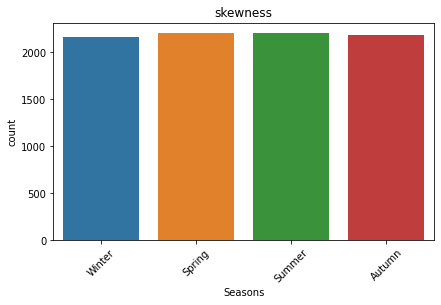

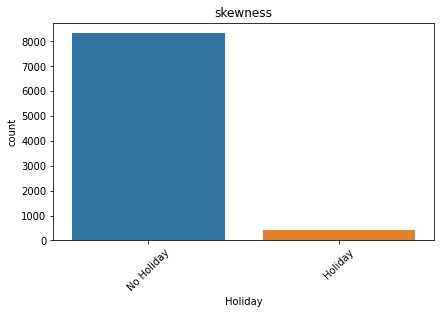

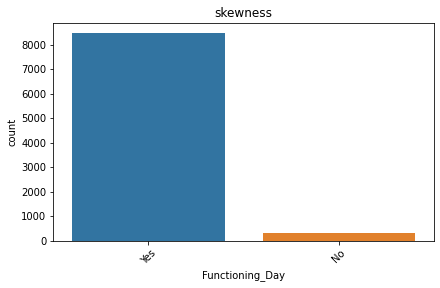

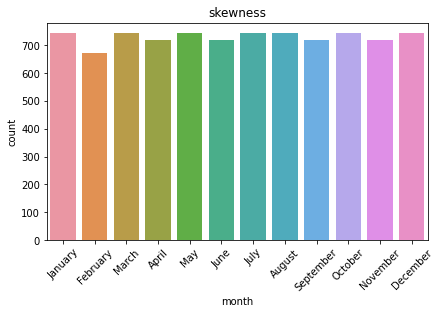

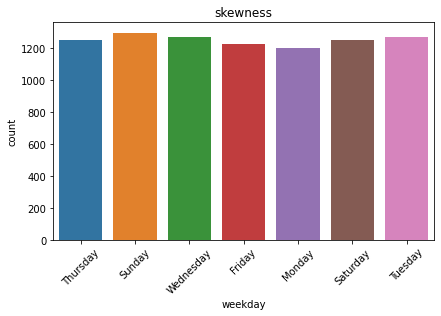

In [28]:
# density plot of numerical columns
# Distribution of numeric_features

for col in cat_attribs:

  plt.figure(figsize=(15,4))

  plt.subplot(1, 2, 1)
  sns.countplot(bike_rent[col])
  plt.title(f'skewness')   
  plt.xticks(rotation = 45)
  plt.show()  
  

##Bivariate

**1. Numerical Variable vs Dependent Variable**

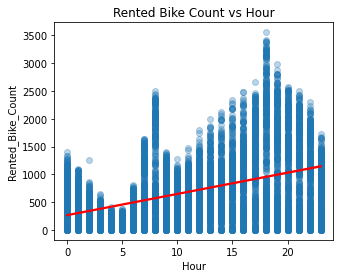

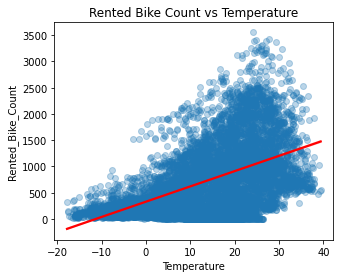

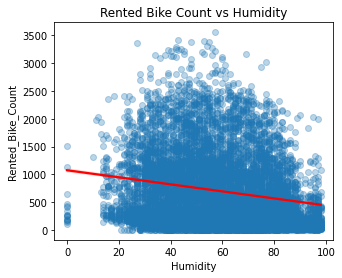

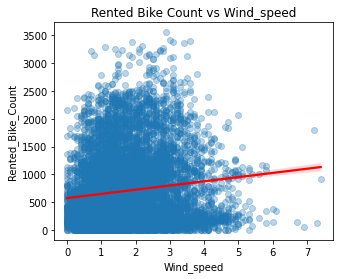

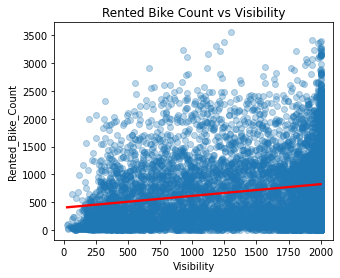

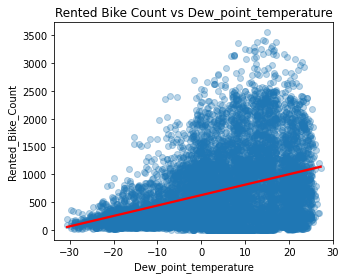

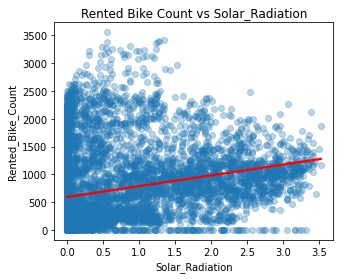

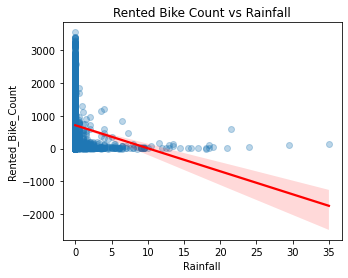

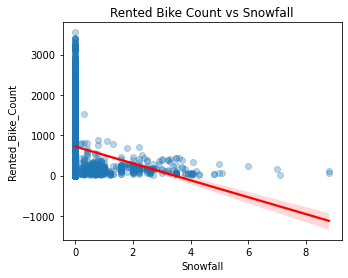

In [29]:
col = num_attribs[1]
for col in num_attribs[1:]:
  plt.figure(figsize=(5,4))
  # sns.scatterplot(x = bike_rent[col] ,y = bike_rent['Rented_Bike_Count'] ,palette= 'hls' , alpha = .5)
  correlation =  bike_rent['Rented_Bike_Count']
  sns.regplot(x = bike_rent[col] ,y = bike_rent['Rented_Bike_Count'] , line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
  plt.title("Rented Bike Count vs " + col)



**2. categorical  Variable vs Dependent Variable**

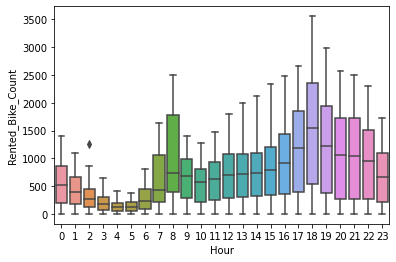

In [30]:
sns.boxplot(y= bike_rent.Rented_Bike_Count, x=bike_rent.Hour) 

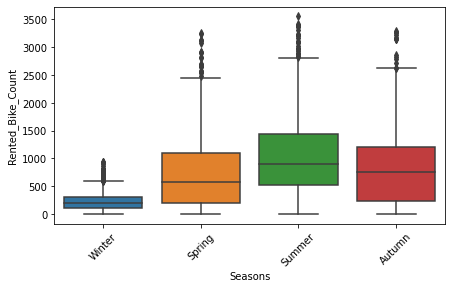

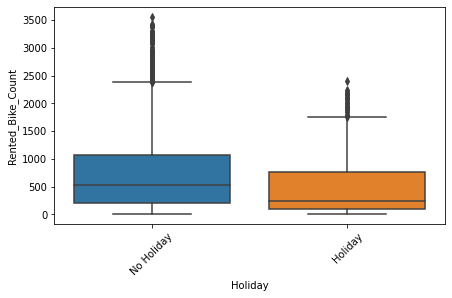

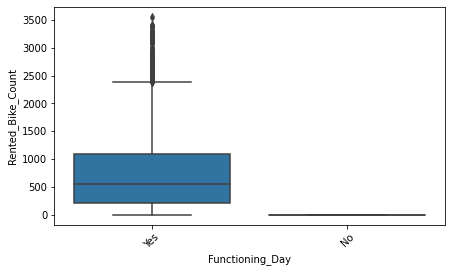

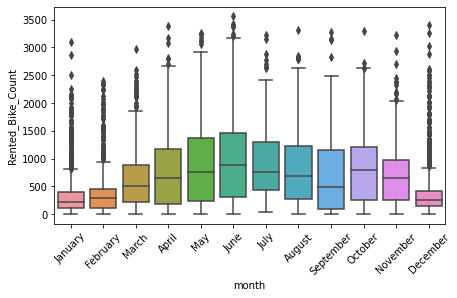

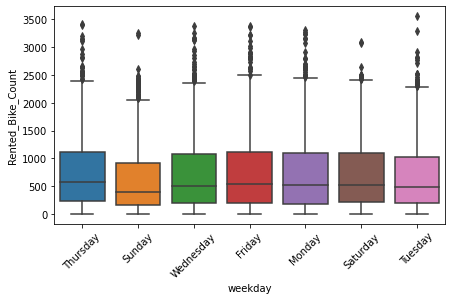

In [31]:
# col = cat_attribs[1]
for col in cat_attribs:
  plt.figure(figsize = (7,4))

  sns.boxplot(x = bike_rent[col], y= bike_rent['Rented_Bike_Count'] )
  plt.xticks(rotation = 45)

## Multivariate (Looking for coreealtion)

In [32]:
corr_matrix = bike_rent.corr()
corr_matrix["Rented_Bike_Count"].sort_values(ascending=False)

Rented_Bike_Count        1.000000
Temperature              0.538558
Hour                     0.410257
Dew_point_temperature    0.379788
Solar_Radiation          0.261837
Visibility               0.199280
Wind_speed               0.121108
Rainfall                -0.123074
Snowfall                -0.141804
Humidity                -0.199780
Name: Rented_Bike_Count, dtype: float64

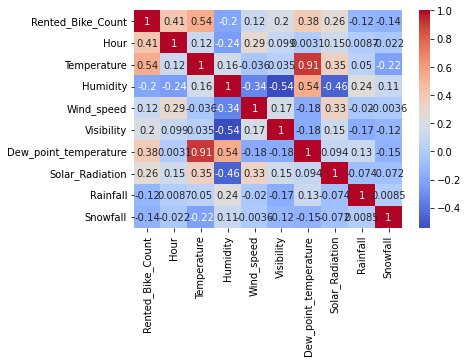

In [33]:
sns.heatmap(data = corr_matrix, annot = True, cmap = "coolwarm")
plt.show()

#Prepareing data for MLA

In [34]:
bike_rent_df = bike_rent.copy()

## Removing Multicollinearity

In [35]:
# Using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  '''
  Calculating VIF
  '''

  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [36]:
cal_vif(bike_rent[[i for i in bike_rent.describe().columns if i not in ['Rented_Bike_Count','Dew_point_temperature']]])

,variables,VIF
0,Hour,3.921832
1,Temperature,3.228318
2,Humidity,4.868221
3,Wind_speed,4.608625
4,Visibility,4.710170
5,Solar_Radiation,2.246791
6,Rainfall,1.079158
7,Snowfall,1.120579


In [37]:
numeric_features = cal_vif(bike_rent_df[[i for i in bike_rent_df.describe().columns if i not in ["Rented Bike Count", "Dew point temperature(°C)"]]])["variables"].values

In [38]:
numeric_features

array(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall'], dtype=object)

## Statistical Test

**Pearson Correlation**

In [39]:
from scipy import stats

In [40]:
num_feature = []
for col in numeric_features:
  pearson_coef, p_value = stats.pearsonr(bike_rent_df[col],bike_rent_df['Rented_Bike_Count'])
  if abs(round(pearson_coef,2)) >= .2 and p_value < 0.05:
    num_feature.append(col)

In [41]:
num_feature

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation']

**ANOVA**

In [42]:
anova_df= bike_rent_df[["Seasons", "Rented_Bike_Count"]].groupby(["Seasons"])
anova_df.head(2) 

,Seasons,Rented_Bike_Count
0,Winter,254
1,Winter,204
2160,Spring,71
2161,Spring,147
4368,Summer,963
4369,Summer,776
6576,Autumn,1075
6577,Autumn,975


In [43]:
# ANOVA
f_val, p_val = stats.f_oneway(anova_df.get_group("Winter")["Rented_Bike_Count"], anova_df.get_group("Spring")["Rented_Bike_Count"],
                              anova_df.get_group("Summer")["Rented_Bike_Count"], anova_df.get_group("Autumn")["Rented_Bike_Count"])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 776.4678149879504 , P = 0.0


In [44]:
# ANOVA
f_val, p_val = stats.f_oneway(anova_df.get_group("Winter")["Rented_Bike_Count"], anova_df.get_group("Spring")["Rented_Bike_Count"],
                              anova_df.get_group("Summer")["Rented_Bike_Count"], anova_df.get_group("Autumn")["Rented_Bike_Count"])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 776.4678149879504 , P = 0.0


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.

**Two- Sample t-test**

In [45]:
ttest_df1= bike_rent_df[["Holiday", "Rented_Bike_Count"]].groupby(["Holiday"])
ttest_df1.head(2)

,Holiday,Rented_Bike_Count
0,No Holiday,254
1,No Holiday,204
504,Holiday,196
505,Holiday,250


In [46]:
# Test
t_val, p_val = stats.ttest_ind(ttest_df1.get_group("No Holiday")["Rented_Bike_Count"], ttest_df1.get_group("Holiday")["Rented_Bike_Count"])  
 
print( "T-test results: T=", t_val, ", P =", p_val)   

T-test results: T= 6.787434045415916 , P = 1.2156443235024942e-11


In [47]:
ttest_df2= bike_rent_df[["Functioning_Day", "Rented_Bike_Count"]].groupby(["Functioning_Day"])

ttest_df2.head(2)

,Functioning_Day,Rented_Bike_Count
0,Yes,254
1,Yes,204
3144,No,0
3145,No,0


In [48]:
# T Test
t_val, p_val = stats.ttest_ind(ttest_df2.get_group("Yes")["Rented_Bike_Count"], ttest_df2.get_group("No")["Rented_Bike_Count"])  

print( "T-test results: T=", t_val, ", P =", p_val)   

T-test results: T= 19.495555368920538 , P = 6.732210575500657e-83


 The p-value is less than the alpha level: p <.05. We can reject the null hypothesis that there is no difference between means.

**All three categorical features are important**

**Transformations**

In [49]:
bike_rent_df_temp = bike_rent.copy()

In [50]:
bike_rent_df_temp.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday


In [51]:
bike_rent_df_temp.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [52]:
bike_rent_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekday'],
      dtype='object')

In [53]:
pos_col = []
for col in bike_rent_df.columns:
  if bike_rent_df[col].min() == 0:
    bike_rent_df_temp.replace(to_replace = 0,value = 0.00001,inplace = True)
    pos_col+=[col]

In [54]:
print(pos_col)

['Rented_Bike_Count', 'Hour', 'Humidity', 'Wind_speed', 'Solar_Radiation', 'Rainfall', 'Snowfall']


In [55]:
print('col          nothing      boxcox    sqrt      log10       logp1        ')
for col in pos_col:

  bike_rent_df_temp[col+'bc'] = stats.boxcox(bike_rent_df_temp[col])[0]
  print(col)
  print('               ',round(bike_rent_df_temp[col].skew(),2),'   ',round((bike_rent_df_temp[col+'bc']).skew(),2),'      ',round((np.sqrt(bike_rent_df_temp[col])).skew(),2),'   ',round((np.log10(bike_rent_df_temp[col]+1)).skew(),2),'   ',round((np.log1p(bike_rent_df_temp[col])).skew(),2))


col          nothing      boxcox    sqrt      log10       logp1        
Rented_Bike_Count
                1.15     -0.38        0.24     -1.83     -1.83
Hour
                0.0     -0.74        -0.74     -1.17     -1.17
Humidity
                0.06     -0.14        -0.5     -2.16     -2.16
Wind_speed
                0.89     -0.06        -0.0     0.01     0.01
Solar_Radiation
                1.5     0.04        0.81     1.06     1.06
Rainfall
                14.53     3.7        6.64     6.46     6.46
Snowfall
                8.44     4.1        5.32     5.81     5.81


In [56]:
bc_attribs = ['Rented_Bike_Count' ,'Wind_speed','Visibility','Solar_Radiation','Rainfall','Snowfall']

In [57]:
bike_rent_df_temp['Wind_speed'+'sqrt'] = np.sqrt(bike_rent_df_temp['Wind_speed'])


In [58]:
del bike_rent_df_temp['Wind_speedbc']
del bike_rent_df_temp['Hourbc']
del bike_rent_df_temp['Humiditybc']

In [59]:
for col in bc_attribs:
  del bike_rent_df_temp[col]

## Spliting data

In [60]:
bike_rent_df = bike_rent_df_temp.copy()

In [61]:
bike_rent = bike_rent_df.drop(["Rented_Bike_Countbc"], axis=1) # drop labels for training set
bike_rent_labels = bike_rent_df["Rented_Bike_Countbc"].copy()

In [62]:
# Numeical features

num_attribs = bike_rent.describe().columns
num_attribs

Index(['Hour', 'Temperature', 'Humidity', 'Dew_point_temperature',
       'Solar_Radiationbc', 'Rainfallbc', 'Snowfallbc', 'Wind_speedsqrt'],
      dtype='object')

In [63]:
bike_rent_num = bike_rent[num_attribs]
bike_rent_num.head(3) 

,Hour,Temperature,Humidity,Dew_point_temperature,Solar_Radiationbc,Rainfallbc,Snowfallbc,Wind_speedsqrt
0,0.00001,-5.2,37.0,-17.6,-12.351555,-9.738188e+06,-2.111104e+08,1.483240
1,1.00000,-5.5,38.0,-17.6,-12.351555,-9.738188e+06,-2.111104e+08,0.894427
2,2.00000,-6.0,39.0,-17.7,-12.351555,-9.738188e+06,-2.111104e+08,1.000000


In [64]:
cat_attribs = bike_rent.describe(include = "object").columns.to_list()
cat_attribs 

['Seasons', 'Holiday', 'Functioning_Day', 'month', 'weekday']

In [65]:
bike_rent_cat = bike_rent[cat_attribs]
bike_rent_cat.head(3) 

,Seasons,Holiday,Functioning_Day,month,weekday
0,Winter,No Holiday,Yes,January,Thursday
1,Winter,No Holiday,Yes,January,Thursday
2,Winter,No Holiday,Yes,January,Thursday


In [66]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(bike_rent , bike_rent_labels, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(bike_rent , bike_rent_labels, test_size = 0.2, random_state = 42)

##pipeline

In [67]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


full_pipeline = ColumnTransformer([
                                   
                                   ('std_scaler', StandardScaler(), num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs)
        ])
bike_rent_prepared = full_pipeline.fit_transform(X_train)

In [68]:
X = bike_rent 
y = bike_rent_labels 

# Modeling

In [69]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score



In [70]:
def print_reg_meterics(y_true, y_pred):
  '''
  print mean absolute error,Mean square error and R2 sqore
  '''
  print(f'mean absolute  error    =   {mean_absolute_error(y_true, y_pred)}   ' )   
  print(f'mean root sqaure error  =   {np.sqrt(mean_squared_error(y_true, y_pred))}  ' )   
  print(f'r2 square               =   {r2_score(y_true, y_pred)} \n ' )   

In [71]:
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)

In [72]:
def run_model(model,X_train,y_train,X_test,y_test):

  # X_train = full_pipeline.fit_transform(X_train)
  # X_test = full_pipeline.fit_transform(X_test)

  model.fit(X_train,y_train)
  y_pred_train = model.predict(X_train) 

  y_pred = model.predict(X_test)  
  print('train data score')
  print_reg_meterics(y_train, y_pred_train)
  print('test data scores')
  print_reg_meterics(y_test,y_pred)

  model_scores = cross_val_score(model, X_train, 
                      y_train, scoring = ("r2"), cv = 10)
  mean_score = np.mean(model_scores)
  return mean_score

## Linear Regeression

In [73]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg_score = run_model(lin_reg,X_train,y_train,X_test,y_test) 
lin_reg_score 


train data score
mean absolute  error    =   3.341238721744822   
mean root sqaure error  =   4.281234328820746  
r2 square               =   0.7536909921993225 
 
test data scores
mean absolute  error    =   3.3396197203076343   
mean root sqaure error  =   4.313325044017066  
r2 square               =   0.7453645595681486 
 


0.7505227986082861

## KNeighborsRegressor

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
rnn_score = run_model(knn,X_train,y_train,X_test,y_test)
rnn_score 

train data score
mean absolute  error    =   1.9691485932615946   
mean root sqaure error  =   2.7385923989991356  
r2 square               =   0.899214723092377 
 
test data scores
mean absolute  error    =   2.5326321387193413   
mean root sqaure error  =   3.4618475832035758  
r2 square               =   0.8359748811329364 
 


0.8319662664297185

## DecisionTreeRegressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0) 
dt_reg_score = run_model(dt_reg,X_train,y_train,X_test,y_test)
dt_reg

train data score
mean absolute  error    =   1.443543407589102e-16   
mean root sqaure error  =   1.04393749197108e-15  
r2 square               =   1.0 
 
test data scores
mean absolute  error    =   2.104647546002819   
mean root sqaure error  =   3.400983135959868  
r2 square               =   0.8416917922996143 
 


DecisionTreeRegressor(random_state=0)

## RandomForestRegressor

In [76]:
from sklearn.ensemble import RandomForestRegressor 
rf_reg = RandomForestRegressor()
rf_reg_score = run_model(rf_reg,X_train,y_train,X_test,y_test) 
rf_reg_score

train data score
mean absolute  error    =   0.5724635668494271   
mean root sqaure error  =   0.874373502885365  
r2 square               =   0.9897260777930215 
 
test data scores
mean absolute  error    =   1.5225332200746402   
mean root sqaure error  =   2.292931961971011  
r2 square               =   0.928042376560635 
 


0.9238172010072357

## GradientBoostingRegressor


In [77]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr_score = run_model(gbr,X_train,y_train,X_test,y_test) 
gbr_score 

train data score
mean absolute  error    =   1.9261868172928098   
mean root sqaure error  =   2.6638730850902816  
r2 square               =   0.9046393162626938 
 
test data scores
mean absolute  error    =   2.0102105283763523   
mean root sqaure error  =   2.8067306346882694  
r2 square               =   0.8921808397862282 
 


0.8959046356083722

**Since Random forest giving best result We try to search best parameters**

## searching best parameters

In [78]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
# import stats

# Create the random grid
param_distribs = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                                cv = 3, scoring = "r2", random_state = 42)
rnd_search.fit(X_train, y_train) 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2')

In [80]:
rnd_search.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=2000, random_state=42)

In [157]:
rnd_search.best_score_

0.9144379797225847

In [158]:
predictions = rnd_search.best_estimator_.predict(X_test)

r2_score(y_test, predictions)

0.9256076153159001

In [83]:
rnd_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [204]:
# Grid Search

from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': ['True'],
    "max_features": ['auto'],
    'max_depth' : [140],
    'min_samples_leaf' : [1],
    'min_samples_split' : [3],
    'n_estimators' : [2050],
    }

reg = RandomForestRegressor()
grid_search = GridSearchCV(reg, param_grid, cv = 5, scoring = "r2",verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=140, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2050; total time=  57.1s
[CV] END bootstrap=True, max_depth=140, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2050; total time=  56.6s
[CV] END bootstrap=True, max_depth=140, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2050; total time=  56.5s
[CV] END bootstrap=True, max_depth=140, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2050; total time=  56.4s
[CV] END bootstrap=True, max_depth=140, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2050; total time=  56.3s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': ['True'], 'max_depth': [140],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [3], 'n_estimators': [2050]},
             scoring='r2', verbose=2)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_features': [5], 'n_estimators': [870, 890, 930]},
             return_train_score=True, scoring='r2')

In [ ]:
{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 2000} 

In [200]:
grid_search.best_estimator_ 

RandomForestRegressor(bootstrap='True', max_depth=140, min_samples_split=3,
                      n_estimators=2050)

In [205]:
grid_search.best_params_ 

{'bootstrap': 'True',
 'max_depth': 140,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 2050}

In [206]:
print(grid_search.best_score_*100)

92.25589185313862


In [207]:
predictions = grid_search.best_estimator_.predict(X_test)

r2_score(y_test, predictions)

0.9277941046294206

## CatBoost

In [ ]:
!pip install catboost

In [89]:
from catboost import CatBoostRegressor
cbr =  CatBoostRegressor(verbose = 0)
cbr_score = run_model(cbr,X_train,y_train,X_test,y_test) 
cbr_score 

train data score
mean absolute  error    =   1.050088889986304   
mean root sqaure error  =   1.4739628590041594  
r2 square               =   0.9708045363196318 
 
test data scores
mean absolute  error    =   1.4123596236134406   
mean root sqaure error  =   2.1135893660408094  
r2 square               =   0.9388585540025078 
 


0.9385298364312504

## LightGBM

In [90]:
import lightgbm as lgb
lgbr=lgb.LGBMRegressor()
lgbr_score = run_model(lgbr,X_train,y_train,X_test,y_test) 
lgbr_score

train data score
mean absolute  error    =   1.2055331724187863   
mean root sqaure error  =   1.7278211968257466  
r2 square               =   0.9598819429414198 
 
test data scores
mean absolute  error    =   1.5199446441641367   
mean root sqaure error  =   2.2339211783168214  
r2 square               =   0.9316985118905606 
 


0.931619556899026